<a href="https://colab.research.google.com/github/Ziroint/Desain-AnalisisAlgoritma/blob/main/DAA_Pertemuan_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

Pengukuran centrality

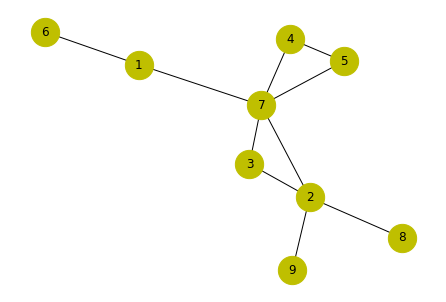

In [42]:
vertices = range(1,9)
edges = [(7,2),(2,3),(7,4),(4,5),(7,3),(7,5),(1,6),(1,7),(2,8),(2,9)]
G = nx.Graph()
G.add_nodes_from(vertices)
G.add_edges_from(edges)
nx.draw(G, with_labels=True, node_color ='y', node_size=800)

Pengukuran Degree Centrality

In [17]:
nx.degree_centrality(G)

{1: 0.25,
 2: 0.5,
 3: 0.25,
 4: 0.25,
 5: 0.25,
 6: 0.125,
 7: 0.625,
 8: 0.125,
 9: 0.125}

Pengukuran betweenness Centrality

In [18]:
nx.betweenness_centrality(G)

{1: 0.25,
 2: 0.46428571428571425,
 3: 0.0,
 4: 0.0,
 5: 0.0,
 6: 0.0,
 7: 0.7142857142857142,
 8: 0.0,
 9: 0.0}

Pengukuran Closeness Centrality

In [19]:
nx.closeness_centrality(G)

{1: 0.5,
 2: 0.6153846153846154,
 3: 0.5333333333333333,
 4: 0.47058823529411764,
 5: 0.47058823529411764,
 6: 0.34782608695652173,
 7: 0.7272727272727273,
 8: 0.4,
 9: 0.4}

Pengukuran EigenVector Centrality

In [21]:
centrality = nx.eigenvector_centrality(G)
sorted((v, '{:0.2f}'.format(c)) for v,c in centrality.items())

[(1, '0.24'),
 (2, '0.45'),
 (3, '0.36'),
 (4, '0.32'),
 (5, '0.32'),
 (6, '0.08'),
 (7, '0.59'),
 (8, '0.16'),
 (9, '0.16')]

Latihan 1

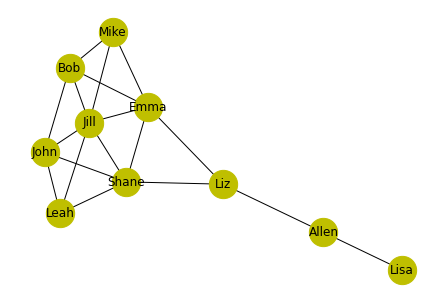

In [37]:
vertices2 = ('Mike','Bob','Jill','John','Leah','Shane','Emma','Liz','Allen','Lisa')
edges2 = [('Mike','Bob'),('Mike','Emma'),('Mike','Jill'),
         ('Bob','Mike'),('Bob','Emma'),('Bob','Jill'),('Bob','John'),
         ('John','Bob'),('John','Jill'),('John','Leah'),('John','Shane'),
         ('Leah','John'),('Leah','Jill'),('Leah','Shane'),
         ('Jill','Bob'),('Jill','John'),('Jill','Emma'),('Jill','Shane'),('Jill','Mike'),('Jill','Leah'),
         ('Shane','Leah'),('Shane','Jill'),('Shane','John'),('Shane','Emma'),
         ('Emma','Jill'),('Emma','Mike'),('Emma','Bob'),('Emma','Shane'),('Emma','Liz'),
         ('Liz','Emma'),('Liz','Shane'),('Liz','Allen'),
         ('Allen','Liz'),('Allen','Lisa'),
         ('Lisa','Allen')
         ]
G = nx.Graph()
G.add_nodes_from(vertices2)
G.add_edges_from(edges2)
nx.draw(G, with_labels=True, node_color ='y', node_size=800)

Latihan 1 Eigenvector

In [38]:
centrality2 = nx.eigenvector_centrality(G)
sorted((v, '{:0.2f}'.format(c)) for v,c in centrality2.items())

[('Allen', '0.05'),
 ('Bob', '0.35'),
 ('Emma', '0.40'),
 ('Jill', '0.48'),
 ('John', '0.35'),
 ('Leah', '0.29'),
 ('Lisa', '0.01'),
 ('Liz', '0.20'),
 ('Mike', '0.29'),
 ('Shane', '0.40')]

Latihan 2

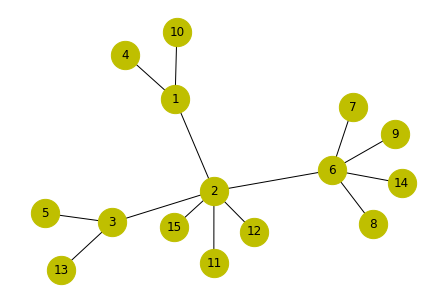

In [40]:
vertices3 = range(1,15)
edges3 = [(1,4),(1,10),(1,2),
         (2,1),(2,12),(2,11),(2,15),(2,3),(2,6),
         (3,5),(3,13),(3,2),
         (4,1),
         (5,3),
         (6,9),(6,7),(6,14),(6,8),(6,2),
         (7,6),
         (8,6),
         (9,6),
         (10,1),
         (11,2),
         (12,2),
         (13,3),
         (14,6),
         (15,2)]
G = nx.Graph()
G.add_nodes_from(vertices3)
G.add_edges_from(edges3)
nx.draw(G, with_labels=True, node_color ='y', node_size=800)

Latihan 2 Eigenvector

In [41]:
centrality3 = nx.eigenvector_centrality(G)
sorted((v, '{:0.2f}'.format(c)) for v,c in centrality3.items())

[(1, '0.29'),
 (2, '0.60'),
 (3, '0.29'),
 (4, '0.10'),
 (5, '0.10'),
 (6, '0.44'),
 (7, '0.16'),
 (8, '0.16'),
 (9, '0.16'),
 (10, '0.10'),
 (11, '0.21'),
 (12, '0.21'),
 (13, '0.10'),
 (14, '0.16'),
 (15, '0.21')]

Membuat Network berdasarkan data pemodelan facebook dari stanford

In [44]:
G_fb = nx.read_edgelist("/content/drive/MyDrive/Kuliah/facebook_combined.txt", create_using = nx.Graph(), nodetype = int)

In [45]:
print(nx.info(G_fb))

Graph with 4039 nodes and 88234 edges


(-1.0239789161086084,
 0.9956912073493005,
 -0.913769496679306,
 1.1818514001369476)

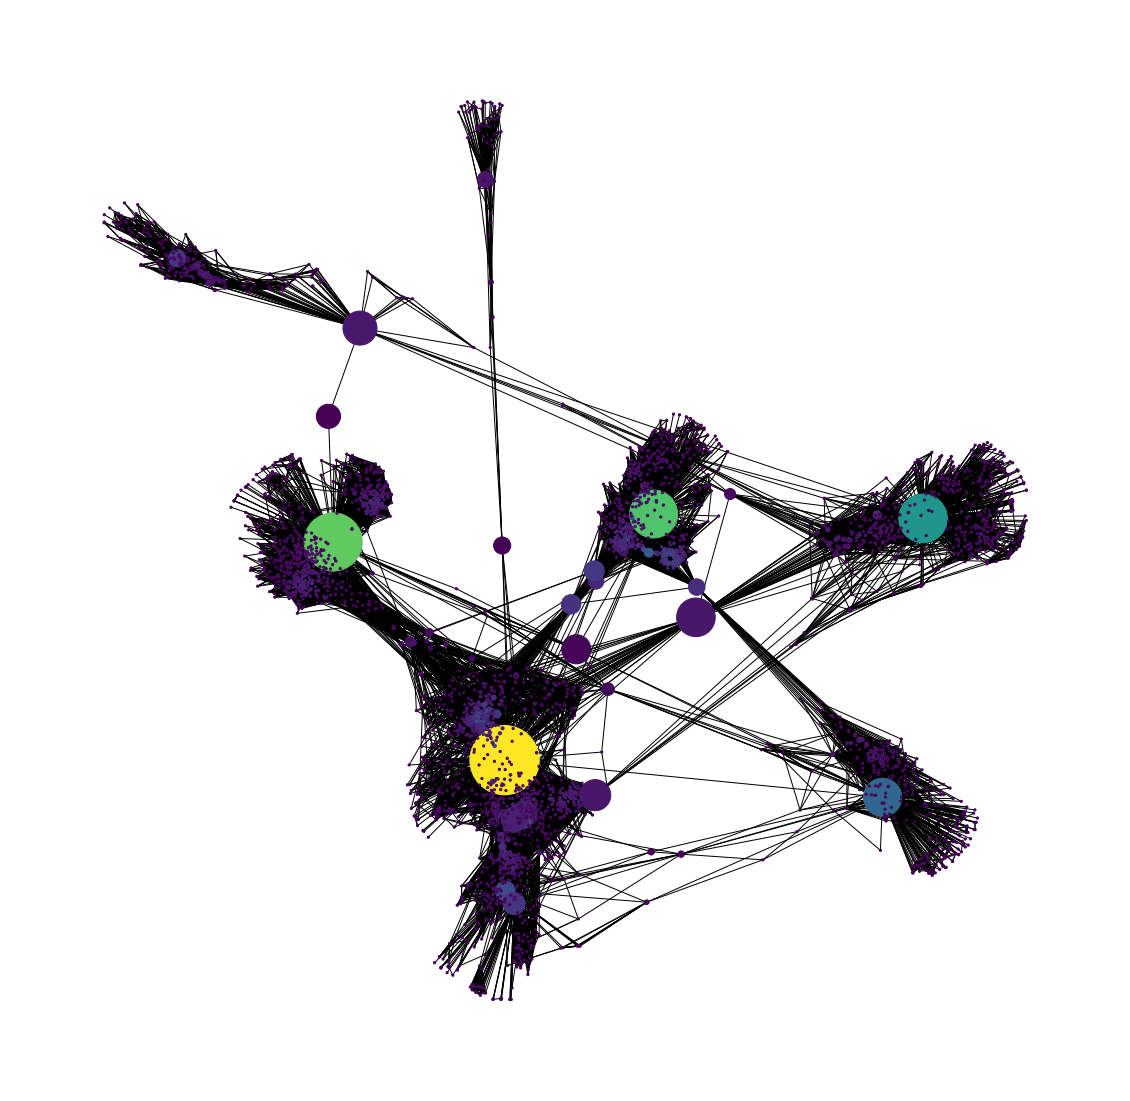

In [48]:
pos = nx.spring_layout(G_fb)
betCent = nx.betweenness_centrality(G_fb, normalized=True, endpoints = True)
node_color = [20000.0*G_fb.degree(v) for v in G_fb]
node_size = [v*10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G_fb, pos=pos, with_labels=False,
                 node_color = node_color,
                 node_size = node_size)
plt.axis('off')